In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Introduction
------------

In this video I wanted to give a few more examples of using some of the algorithms available in SciPy.  In addition, I wanted to look at some general concepts and ideas you should keep in mind when using SciPy.


Functional Programming and Passing Functions as Parameters
----------------------------------------------------------

Before we begin, let me bring up one general concept that you must absolutely grasp in order to use many of the SciPy library
modules.  Most SciPy functions expect you to provide a function you create as an input parameter to another function.  This
function you provide describes some aspect of your problem, and SciPy then provides general methods that let you integrate your 
function, or find solutions to your function, or find its minimal points, etc.  Passing in a function to another function is
a very powerful technique.  Using functions as parameters to other functions is a technique of 
[functional programming](http://en.wikipedia.org/wiki/Functional_programming).  In functional
programming, we treat computation as the evaluation of mathematical functions.  Functions, in this approach, are completely stateless
and are completely independent of one another.  This approach has many advantages and disadvantages, and it can be compared and
contrasted to object oriented programming which in some ways lies on the opposite end of the spectrum, in the sense that in OO
programming, classes basically hold and pass around state and context of objects.

But in any case, you do need to understand how Python functions are being  used as functions in a mathematical sense, and how this
allows one to use the SciPy library methods to perform various scientific algorithms on your functions.

Lets look once again at the function of 1 variable that was used in our lecture notebook for demonstrating the optimization library
used to find the minimum of a function.  The function looked like this:

$f(x) = 4x^3 + (x-2)^2 + x^4$

And we created a (vectorized) Python function to represent this mathematical function like this:

In [2]:
def f(x):
    return 4*x**3 + (x - 2)**2 + x**4

Recall from our last lecture that if we think of `x` as a vector of values, then this function $f(x)$ will return the result of computing this value for each of the scalar elements in the vector `x` we pass into it.  For example, we might want to visualize how this function
changes as `x` varies by plotting the relation of `x` to $f(x)$

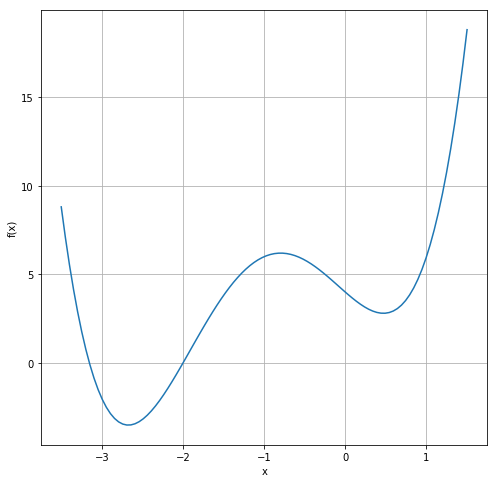

In [3]:
x = np.linspace(-3.5, 1.5, 100) # array of 100 elements evenly spaced from -3.5 to 1.5

# plot result
plt.figure(figsize=(8,8))
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

This function was interesting for the optimization problem because it has 2 local minimum values, one between 0 and 1, and one close to -3.  But one value (the one close to -3) is slightly more "minimum" than the other (it is below 0, while the other is above 0).

The methods from SciPy's optimize library take two main parameters, the function you want to find the optimal (minimum)
value for, and an initial guess.  In the case where our function is a function of only 1 dimension, SciPy expects the initial guess to be
a single value.  So for example, if we want to try out the BFGS algorithm to find the minimum, we can do the following:

In [4]:
from scipy.optimize import fmin_bfgs

In [5]:
fmin_bfgs(f, [0.5])

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

In [6]:
fmin_bfgs(f, [-2.0])

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

Here the first call to the BFGS minimization function had an initial guess of 0.5, and after 3 iterations it converged on the minimum at 0.469 (which has a value at that point of 2.8).  Likewise, the second time we performed the minimization, we gave an initial guess of -2.0
and the function converged on the global minimum at x = -2.67.

As was shown, some initial values can cause the BFGS optimization algorithm to converge to the local minimum (like 0.5), while other initial values converge to the true global minimum.  The fmin_bfgs function is returning the x value where the minimum of the function was determined to lie as the result of calling the function.  In the output/status that this method sends to standard output, we can also see
what the value of the function was at the minimum that was found, as well as some other information about how the run of
the algorithm went.

If we want to find the actual value $f(x)$ at that minimum point, we have to use our original function:

In [7]:
min_x = fmin_bfgs(f, [-2.0])

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


In [8]:
print( min_x ) 
print( f(min_x) ) 

[-2.67298151]
[-3.50664146]


So the minimum value of the function $f(x)$ occurs when x is -2.6729, and that minimum values is -3.5066

Lets look at a slightly more complex example of performing a minimization on a function.  Our previous function was a function of 1
variable.  But we often have 2, 3 or even very high dimensional functions that we would like to find the minimum points 
within. The [SciPy online tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) gives the following 
example of a common test function used for optimization, called the rosen function:

$f(\vec{x}) = \sum_{i=1}^{N-1} 100 (x_i - x_{i-1}^2)^2 + (1 - x_{i-1})^2 $

This is a function of N variables (N >= 2), and thus don't be fooled by the x on the left side, this really represents a N 
dimensional vector now, not a single value.  So for example, when N=2, this equation defines a function that takes 2 values $x_0$ and $x_1$ (which you could also think of as x and y), and computes a value for each $x_0, x_1$ pair.

For example, when N is 2, we could rewrite the above summation formula, using x for $x_0$ and y for $x_1$ like this:

$f(x,y) = 100 (y - x^2)^2 + (1 - x)^2$

In [9]:
def f_rosen_2(x, y):
    """rosen function of N=2 dimensions.  We renamed our x_0 dimension as x, and x_1 dimension as y"""
    return 100 * (y - x**2)**2 + (1 - x)**2

To visualize this function, lets create a color plot, where the value of our function at any $x,y$ point will be indicated by a color coding (you will see an example of this in next weeks lecture notebook on matplotlib and plotting/visualization).  We 
can do something like this:



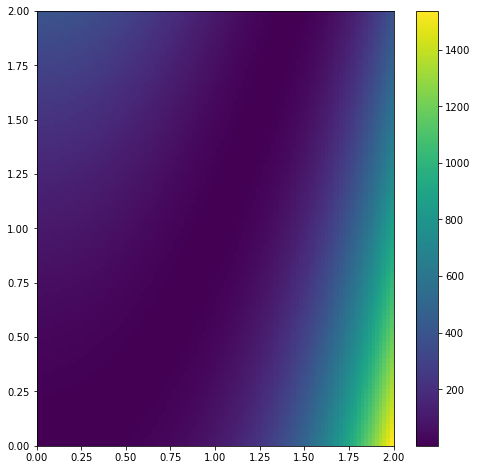

In [10]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X,Y = np.meshgrid(x, y)
Z = f_rosen_2(X, Y)
plt.figure(figsize=(8,8))
plt.pcolor(X, Y, Z)
plt.colorbar()

The minimum of the rosen function is known to occur at $x_i = 1.0$ with a minimum value of 0, thus the minimum occurs at x=1.0,
y=1.0 as you can probably kind of see in the figure.

The function I just wrote takes 2 values (which can be scalars, vectors or matrices.  However, the SciPy library expects 
functions you provide for analysis/algorithms to conform to certain specific forms.  For example, 
for the optimization routines, multidimensional functions should take 1 parameter as an input, which will be a numpy 
array of N values for an N dimensional function.  Our above implementation of the rosen function for 2 dimensions actually
has 2 parameters, and so as written will not work with the scipy.optimize routines.  For example:

In [11]:
# try and optimize our rosen function of 2 dimensions, with initial guess of [0.5, 0.5]
#fmin_bfgs(f_rosen_2, [0.5, 0.5])

As I said, the problem is that the fmin_bfgs (and other optimization functions) require that the function to optimize only
takes a single parameter.  And the function should expect that parameter to be an N sized vector of values to evaluate.
So the $x,y$ values need to be expected to come in a NumPy array as [x, y].

We can fix our function for SciPy like this:

In [12]:
def f_rosen_2(v):
    """For rosen function of 2 variables, we expect v to be a numpy vector with 2 values, that correspond to
    our x,y input parameters of the above version of the rosen function of 2 dimensions"""
    x = v[0]
    y = v[1]
    return 100 * (y - x**2)**2 + (1 - x)**2

In [13]:
# try and optimize our rosen function of 2 dimensions, with initial guess of [0.5, 0.5]
fmin_bfgs(f_rosen_2, [0.5, 0.5])

         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 444
         Gradient evaluations: 108


array([ 0.99999584,  0.99999157])

As a final example, the equation for the rosen function we gave actually defines a function for an arbitrarly large number of 
dimensions N.  We wrote an implementation of the functions using the minimum of N=2 dimensions.  But the general case for any
number of N dimensions can be written in Python using NumPy vector operations like this (taken from the SciPy
optimization tutorial page):

In [14]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Don't worry if you don't quite understand the above completely yet, though you should be able to look at the mathematical
formula we gave for the rosen equation above and see some of what is happening here and how it works.  Later on in the course,
when we look at difference equations and discrete grid space models, the above type of numpy vector processing in functions
will make more sense.

Once again, the rosen function above always has a minimum at $x_i = 1.0$.  We can try to find the minimum once again using
the BFGS algorithm.  However many dimensions we give for our initial guess will be the number of dimensions that
the rosen function is being evaluated with:

In [15]:
# minimize rosen function of 5 dimensions
fmin_bfgs(rosen, [0.3, 1.2, 2.8, 0.8, 0.2]) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 392
         Gradient evaluations: 56


array([ 0.99999919,  0.99999838,  0.99999678,  0.99999358,  0.99998715])

Notice that the optimization routine doesn't get the exact right answer (close to 1.0, but not exactly 1.0).  This is usually
fine and not unusual in numeralical computation.  However, the BFGS minimization encountered some problems, as you can kind of
see from the message about the Divide-by-zeror we encountered.

Using a different minimization method can get better results.  For example, lets use the Powell's optimization method instead:

In [16]:
from scipy.optimize import fmin_powell

fmin_powell(rosen, [0.3, 1.2, 2.8, 0.8, 0.2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 1304


array([ 1.,  1.,  1.,  1.,  1.])

Computing Derivatives
---------------------

Lets take look at another example to really make sure we have the hang of defining and passing mathematical 
functions as Python functions to SciPy library routines.  In our lecture notebooks we looked briefly at using SciPy
to calculate the integral of functions over a particular range.  The inverse of integration is derivation.  You should
have learned somewhere in a calculus course how to compute a derivative analytically.  For example, lets go back to this
formula we looked at previously:

$f(x) = 4x^3 + (x-2)^2 + x^4$

If we expand out the middle term using simple algebra and rearrange, we have

$f(x) = x^4 + 4x^3 + x^2 - 4x + 4$

You should have learned at some point how to find the derivative of such an expression, it is simply:

$f'(x) = 4x^3 + 12x^2 + 2x - 4$

We can write simple Python functions for $f(x)$ and $f'(x)$ as 

In [17]:
def f(x):
    return x**4 + 4*x**3 + x**2 - 4*x + 4

def f_1st(x):
    return 4*x**3 + 12*x**2 + 2*x - 4



And as we did before, we can use the above formula to visualize/plot how the function changes as a function of the x value.

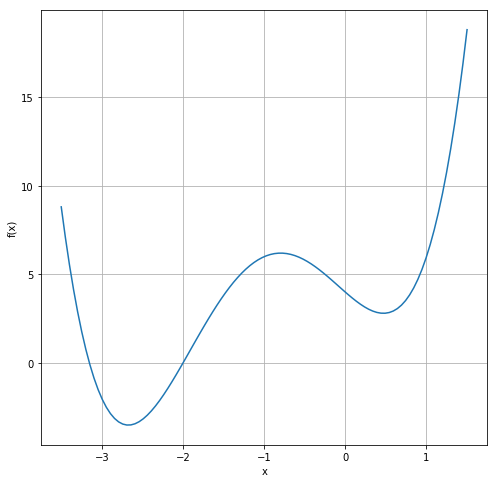

In [18]:
x = np.linspace(-3.5, 1.5, 100) # array of 100 elements evenly spaced from -3.5 to 1.5

# plot result
plt.figure(figsize=(8,8))
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

Recall previously that the minimum of these functions occurred at x=0.46961745 (a local minimum) and at x=-2.67298167 (the global minimum).  One interpretation of the derivative of a function is a measure of the slope of the function at
any given point.  So for example, the slope or derivative should be equal to 0 at each of these 2 minimum points.  We can check
this using our empirical formula of the derivative:

In [19]:
print( f_1st(0.46961745) ) 
print( f_1st(-2.67298167) ) 

2.53753086987e-07
-5.22322454621e-07


The values aren't exactly 0, and that is expected.  Remember we are working with floating point numbers, which are only
approximations of the true values we are representing.   While not exactly 0, these numbers are very small and very close to 0.

Also note we should have a high positive slope around x=-1.8, and a high negative slope around x=-3.2:

In [20]:
print( f_1st(-1.8) ) 
print( f_1st(-3.2) ) 

7.952
-18.592


In the function we have shown here it is very easy to analytically determine what the exact derivative of the function is.
However, for many functions it is not always possible to analytically determine the derivative.  In that case, however, we
can estimate the derivative using various numerical methods.  The SciPy module implements a general method for determining
the derivative that is robust and works well, called the central difference method.  For example, we can determine 
the derivative of all of the same 4 points of our original function like this:

In [21]:
from scipy.misc import derivative

In [22]:
space = 1e-6
print( derivative(f, 0.46961745, dx=space) ) 
print( derivative(f, -2.67298167, dx=space) ) 
print( derivative(f, -1.8, dx=space) ) 
print( derivative(f, -3.2, dx=space) ) 

2.53796983429e-07
-5.18696197105e-07
7.95199999892
-18.5919999973


NOTE: For some reason the derivative method uses an absolutely hideous default for the spacing.  We have to use a much smaller
difference/spacing value in order to get good approximation of derivative at our point using the central difference
method.

Curve Fitting
-------------

As one more example lets look at a very common task in scientific research.  Given a set of data points measured empirically from some  experiment, how do we fit a curve of some model equation of the system to the data such that the curve provides the best fit of the data.

The curve_fit method, again in the scipy.optimize module, uses a least squared fit to fit a model function f to some data.  It is often the case that we have some data we have collected empiracally, and a model of our system under study that has some parameters.  Given the data we collect, we need to determine the most likely value of the parameters that were in effect that produced the data we saw.  If you have
ever seen an example of fitting a line to a curve, this is basically the same thing here.  When fitting a line to a curve, there are 2
parameters (the slope and the intercept of the line) that have to be optimized to fit the particular data.  The curve_fit method we
show here is a general case of this specific problem, of determining the optimimum values of parameters for a function to fit the model
to some gathered data.

First lets look at a model function $f(x)$ that has three parameters, $a, b, c$ that affect how the system performs:

In [23]:
def f(x, a, b, c):
    """x is a scalar or array of points to evaluate function f on.
    a, b and c are parameters of the function.  These should be simple scalar values
    """
    return a * np.exp(-b * x) + c

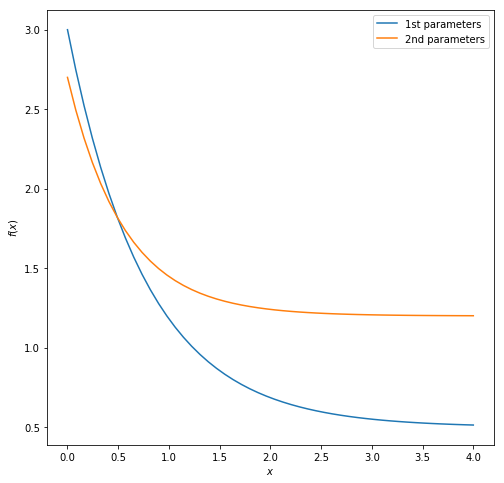

In [24]:
plt.figure(figsize=(8,8))

# function with parameters a=2.5, b=1.3, c=0.5
x = np.linspace(0, 4, 50)
y1 = f(x, 2.5, 1.3, 0.5)
plt.plot(x, y1, label='1st parameters')

# now try parameters a=1.5, b=1.8, c=1.2
y2 = f(x, 1.5, 1.8, 1.2)
plt.plot(x, y2, label='2nd parameters')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Lets say we are collecting data on an experiment, the underlying system of which has parameters set to the first version, e.g. a=2.5, b=1.3, c=0.5.  In a real experiment, there would be some random noise associated with the collection and measurement of each data
point.  For example, we can simulate the generation and collection of such noisy data like this.

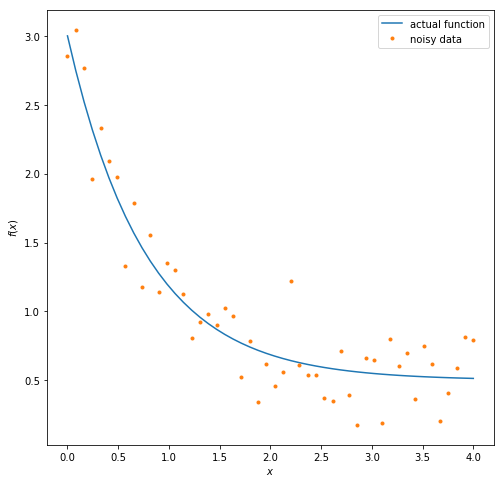

In [25]:
# function with parameters a=2.5, b=1.3, c=0.5
x = np.linspace(0, 4, 50)
y_actual = f(x, 2.5, 1.3, 0.5)
y_noisy = y_actual + np.random.normal(0.0, 0.25, 50)

plt.figure(figsize=(8,8))
plt.plot(x, y_actual, label='actual function')
plt.plot(x, y_noisy, '.', label='noisy data')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

We will be looking at random numbers and randomness more closely later in the class.  For now just see/visualize that the random
function we used above basically adds noise that mostly ranges from -0.25 to 0.25 of the true value.

Back to our task of fitting a curve of our model equation to this noisy data.  The task in this case is, can we determine 
the most likely values of the a,b,c parameters given we believe that our model function $f(x)$ is a good
model of our experimental data.  The curve_fit method is used to perform this task.

In [26]:
from scipy.optimize import curve_fit

In [27]:
popt, pcov = curve_fit(f, x, y_noisy)
print( popt ) 

[ 2.57596783  1.34049382  0.49998381]


The `curve_fit` method returns 2 values, the optimum fitted parameters of our function $f(x)$ and a measure of the goodness of the fit
(the covariance values).  The variance of the fit can give us an idea of how much faith we should put into the parameters that were
discovered of being close to the true values.  Remember that the actual data was generated with paramters a=2.5, b=1.3, c=0.5.
Since there was randomness in the noisy data, the actual values you get in popt above will differ each time your run the above
cells, but the estimated values of a,b, and c should be somewhere around the actual values used to generate the data.

We can visualize how good our fit was by comparing the estimated fitted curve parameters, to our actual parameters:

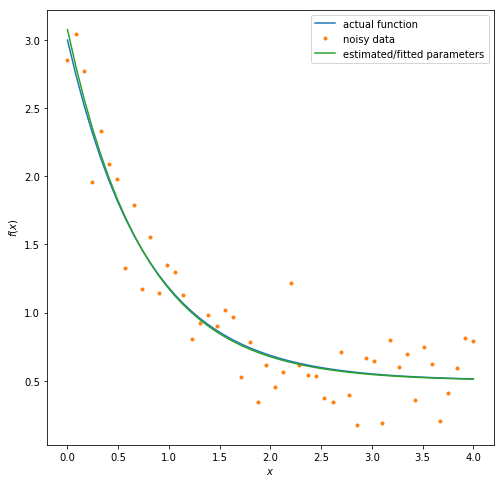

In [28]:
a_est, b_est, c_est = popt
y_est = f(x, a_est, b_est, c_est)

plt.figure(figsize=(8,8))
plt.plot(x, y_actual, label='actual function')
plt.plot(x, y_noisy, '.', label='noisy data')
plt.plot(x, y_est, label='estimated/fitted parameters')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()